# Sistemas Multimedia

In [1]:
!sudo rm -r /tmp/*

rm: cannot remove '/tmp/9wPiTUwMH9': No such file or directory
rm: cannot remove '/tmp/Q2uNej4HpZ': No such file or directory
rm: cannot remove '/tmp/TRPOQmn1cL': No such file or directory
rm: cannot remove '/tmp/xYK0h_XC3S': No such file or directory


## Comparing quantizer in subbands

### Global Configuration

In [2]:
bandas = ["LL","LH","HL","HH"]
imagen ="{:03d}".format(3)
valores_q_step = [8,16,20,55,60,80,100,200,300,512,1028] 
tipos_cuantificacion = ["deadzone"]

In [3]:
q_step=32  
predictor=2  

for q_step in valores_q_step:
    !mkdir /tmp/{q_step} && mkdir /tmp/{q_step}/original  &&  cp sequences/stockholm/{imagen}.png /tmp/{q_step}/original/   
    !mkdir /tmp/{q_step}/dwt  && cp /tmp/{q_step}/original/* /tmp/{q_step}/dwt/  
    !cd src/ && python3 -O DWT.py -p /tmp/{q_step}/dwt/ -i {imagen}
    !ls /tmp/{q_step}/dwt/
    for tipo in tipos_cuantificacion:
        !mkdir /tmp/{q_step}/{tipo} 
        print("Step : "+str(q_step))
        for banda in bandas: 
            print("Banda : "+str(banda))
            !mkdir /tmp/{q_step}/{tipo}/{banda}
            !cp /tmp/{q_step}/dwt/*.png /tmp/{q_step}/{tipo}/{banda}
            !rm -r /tmp/{q_step}/{tipo}/{banda}/{banda}{imagen}.png
            !python3 tools/quantize.py -t {tipo} -i /tmp/{q_step}/dwt/{banda}{imagen}.png -o /tmp/{q_step}/{tipo}/{banda}/{banda}{imagen}.png -q {q_step}  
            !mkdir /tmp/{q_step}/{tipo}/{banda}/inversas  &&  cp /tmp/{q_step}/{tipo}/{banda}/* /tmp/{q_step}/{tipo}/{banda}/inversas  
            !cd src/ && python3 -O DWT.py -p /tmp/{q_step}/{tipo}/{banda}/inversas/ -b  -i {imagen}

003.png  HH003.png  HL003.png  LH003.png  LL003.png
Step : 8
Banda : LL
cp: -r not specified; omitting directory '/tmp/8/deadzone/LL/inversas'
Banda : LH
cp: -r not specified; omitting directory '/tmp/8/deadzone/LH/inversas'
Banda : HL
cp: -r not specified; omitting directory '/tmp/8/deadzone/HL/inversas'
Banda : HH
cp: -r not specified; omitting directory '/tmp/8/deadzone/HH/inversas'
003.png  HH003.png  HL003.png  LH003.png  LL003.png
Step : 16
Banda : LL
cp: -r not specified; omitting directory '/tmp/16/deadzone/LL/inversas'
Banda : LH
cp: -r not specified; omitting directory '/tmp/16/deadzone/LH/inversas'
Banda : HL
cp: -r not specified; omitting directory '/tmp/16/deadzone/HL/inversas'
Banda : HH
cp: -r not specified; omitting directory '/tmp/16/deadzone/HH/inversas'
003.png  HH003.png  HL003.png  LH003.png  LL003.png
Step : 20
Banda : LL
cp: -r not specified; omitting directory '/tmp/20/deadzone/LL/inversas'
Banda : LH
cp: -r not specified; omitting directory '/tmp/20/deadzone/LH

In [35]:
!cat suma.py

### Plotting BR/Error


{'LL': [[2456593.0, 6.53019036187066], [2349613.0, 20.5477779812283], [2331807.0, 30.651659138997395], [2181599.0, 207.23736267089845], [2165079.0, 238.4729678683811], [2130539.0, 441.51009894477], [2099700.0, 679.4840627034505], [2001104.0, 2774.7166629367402], [1974716.0, 3405.854334174262], [1936265.0, 9945.989212714301], [1935129.0, 10028.236135186089]], 'LH': [[2276373.0, 4.534849378797743], [2105227.0, 10.985757785373265], [2077266.0, 14.040610080295139], [2038614.0, 28.547782389322915], [2038037.0, 30.50743408203125], [2036234.0, 31.53858100043403], [2035873.0, 32.04040764702691], [2035716.0, 32.35353563096788], [2035716.0, 32.35353563096788], [2035716.0, 32.35353563096788], [2035716.0, 32.35353563096788]], 'HL': [[2188979.0, 4.72096930609809], [2062194.0, 8.99698248969184], [2050077.0, 10.333258734809029], [2038472.0, 13.346742078993056], [2038296.0, 13.462174818250869], [2038168.0, 13.540379842122396], [2038132.0, 13.578203667534723], [2038132.0, 13.578203667534723], [2038132

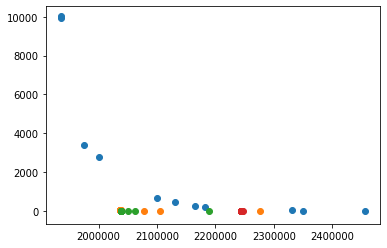

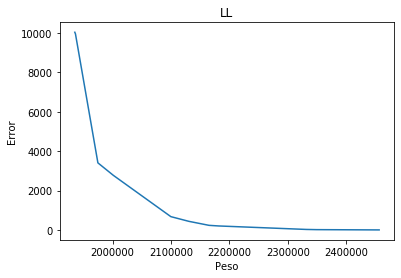

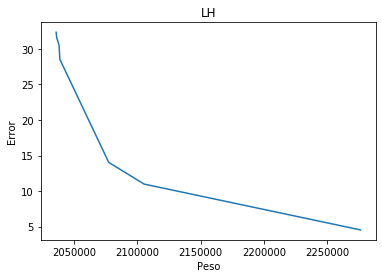

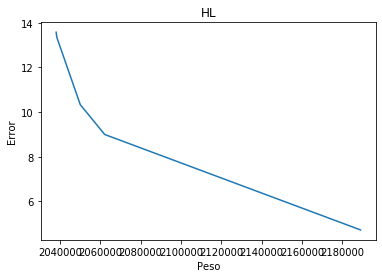

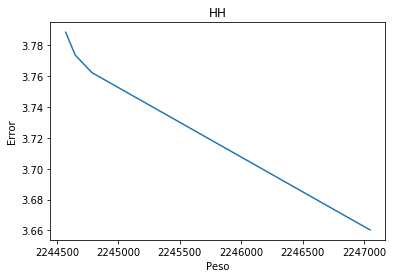

In [19]:
from suma import Sumando
try:
    import matplotlib.pyplot as plt
except:
    os.system("pip3 install matplotlib --user")
    import matplotlib.pyplot as plt

imagenes = 5
resultado_total = {"LL" : [],"LH" : [],"HL" : [],"HH" : []}
s = Sumando()
imagen = 3
for q_step in valores_q_step: 
    diccionario = {}
    for tipo in tipos_cuantificacion:     
        for banda in ["LL", "LH", "HL", "HH"]:
            pesos = s.GetPesosSubbandas(str(tipo), str(q_step),banda,imagen)
            MSE = 0.0
            MSE += s.GetMSESubbanda(tipo,imagen,q_step,banda)
            resultado_total[banda].append([pesos,MSE]) 
print(resultado_total)
plt.figure()
diccionario = resultado_total

C = 4

curve = [None]*C
curve[0] = resultado_total["LL"]
curve[1] = resultado_total["LH"]
curve[2] = resultado_total["HL"]
curve[3] = resultado_total["HH"]

for c in range(4):
    plt.scatter(*zip(*curve[c]))
plt.show()

for tipo in diccionario:
    plot = plt.plot([i[0] for i in diccionario[tipo]],[i[1] for i in diccionario[tipo]],label=tipo)
    #plt.legend(bbox_to_anchor=(1.05, 1), loc='upper', borderaxespad=0.)
    plt.ylabel('Error')
    plt.xlabel('Peso')
    plt.title(tipo)
    plt.show()
    

In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
# Lists of operational RD (Rate/Distortion) points
print(resultado_total)
LL = resultado_total["LL"]
LH = resultado_total["LH"]
HL = resultado_total["HL"]
HH = resultado_total["HH"]

{'LL': [[2456593.0, 6.53019036187066], [2349613.0, 20.5477779812283], [2331807.0, 30.651659138997395], [2181599.0, 207.23736267089845], [2165079.0, 238.4729678683811], [2130539.0, 441.51009894477], [2099700.0, 679.4840627034505], [2001104.0, 2774.7166629367402], [1974716.0, 3405.854334174262], [1936265.0, 9945.989212714301], [1935129.0, 10028.236135186089]], 'LH': [[2276373.0, 4.534849378797743], [2105227.0, 10.985757785373265], [2077266.0, 14.040610080295139], [2038614.0, 28.547782389322915], [2038037.0, 30.50743408203125], [2036234.0, 31.53858100043403], [2035873.0, 32.04040764702691], [2035716.0, 32.35353563096788], [2035716.0, 32.35353563096788], [2035716.0, 32.35353563096788], [2035716.0, 32.35353563096788]], 'HL': [[2188979.0, 4.72096930609809], [2062194.0, 8.99698248969184], [2050077.0, 10.333258734809029], [2038472.0, 13.346742078993056], [2038296.0, 13.462174818250869], [2038168.0, 13.540379842122396], [2038132.0, 13.578203667534723], [2038132.0, 13.578203667534723], [2038132.

In [22]:
# Slopes of each pair of points
total = []
for sub in resultado_total:
    slopes1 = [] 
    curve1 = resultado_total[sub]
    for i in range(len(curve1)-1):
        slope = (curve1[i][1]-curve1[i+1][1])/(curve1[i+1][0]-curve1[i][0])
        slopes1.append((slope, curve1[i+1][0], sub))
    total = total + slopes1
print(total)

[(0.00013102998335537148, 2349613.0, 'LL'), (0.0005674425001555147, 2331807.0, 'LL'), (0.0011756078473310414, 2181599.0, 'LL'), (0.0018907751330195304, 2165079.0, 'LL'), (0.005878318792020524, 2130539.0, 'LL'), (0.007716656303987824, 2099700.0, 'LL'), (0.02125068562855785, 2001104.0, 'LL'), (0.02391760160821289, 1974716.0, 'LL'), (0.17009011153260095, 1936265.0, 'LL'), (0.07240045992234852, 1935129.0, 'LL'), (3.769242872503898e-05, 2105227.0, 'LH'), (0.00010925404294988999, 2077266.0, 'LH'), (0.00037532785648938674, 2038614.0, 'LH'), (0.003396276763792607, 2038037.0, 'LH'), (0.0005719062220758621, 2036234.0, 'LH'), (0.0013901015141077058, 2035873.0, 'LH'), (0.0019944457575858145, 2035716.0, 'LH'), (nan, 2035716.0, 'LH'), (nan, 2035716.0, 'LH'), (nan, 2035716.0, 'LH'), (3.372649117477422e-05, 2062194.0, 'HL'), (0.0001102811129089039, 2050077.0, 'HL'), (0.0002596711197056465, 2038472.0, 'HL'), (0.0006558678366921165, 2038296.0, 'HL'), (0.0006109767489963086, 2038168.0, 'HL'), (0.00105066

/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys


In [31]:
sorted_lists = sorted(total, key=lambda tup: tup[0])[::-1]
print(sorted_lists)

[(nan, 2244571.0, 'HH'), (nan, 2244571.0, 'HH'), (nan, 2244571.0, 'HH'), (nan, 2244571.0, 'HH'), (nan, 2244571.0, 'HH'), (nan, 2244571.0, 'HH'), (nan, 2244571.0, 'HH'), (nan, 2038132.0, 'HL'), (nan, 2038132.0, 'HL'), (nan, 2038132.0, 'HL'), (nan, 2038132.0, 'HL'), (nan, 2035716.0, 'LH'), (nan, 2035716.0, 'LH'), (nan, 2035716.0, 'LH'), (0.17009011153260095, 1936265.0, 'LL'), (0.07240045992234852, 1935129.0, 'LL'), (0.02391760160821289, 1974716.0, 'LL'), (0.02125068562855785, 2001104.0, 'LL'), (0.007716656303987824, 2099700.0, 'LL'), (0.005878318792020524, 2130539.0, 'LL'), (0.003396276763792607, 2038037.0, 'LH'), (0.0019944457575858145, 2035716.0, 'LH'), (0.0018907751330195304, 2165079.0, 'LL'), (0.0013901015141077058, 2035873.0, 'LH'), (0.0011756078473310414, 2181599.0, 'LL'), (0.0010506618170090674, 2038132.0, 'HL'), (0.0006558678366921165, 2038296.0, 'HL'), (0.0006109767489963086, 2038168.0, 'HL'), (0.0005719062220758621, 2036234.0, 'LH'), (0.0005674425001555147, 2331807.0, 'LL'), (0

### Optimal RD Points

In [34]:
R = 40099800# Bit budget
spent = 0
i = 0
optimal = []
while True:
    spent += sorted_lists[i][1]
    if spent < R:
        optimal.append(sorted_lists[i])
    else:
        break
    i += 1
print("Optimal RD points =", optimal)
br = sum([i[1] for i in optimal])
print("bit-rate =", br)

Optimal RD points = [(nan, 2244571.0, 'HH'), (nan, 2244571.0, 'HH'), (nan, 2244571.0, 'HH'), (nan, 2244571.0, 'HH'), (nan, 2244571.0, 'HH'), (nan, 2244571.0, 'HH'), (nan, 2244571.0, 'HH'), (nan, 2038132.0, 'HL'), (nan, 2038132.0, 'HL'), (nan, 2038132.0, 'HL'), (nan, 2038132.0, 'HL'), (nan, 2035716.0, 'LH'), (nan, 2035716.0, 'LH'), (nan, 2035716.0, 'LH'), (0.17009011153260095, 1936265.0, 'LL'), (0.07240045992234852, 1935129.0, 'LL'), (0.02391760160821289, 1974716.0, 'LL'), (0.02125068562855785, 2001104.0, 'LL'), (0.007716656303987824, 2099700.0, 'LL')]
bit-rate = 39918587.0
